In [3]:
from typing import Sequence, Callable

import numpy as np
import scipy.stats
import math
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ABSOLUTE_PATH = "C:/Users/arman/it/prog/AI"
SEED = 3

In [5]:
class Sample:
    def __init__(self, name: str, sample_func: Callable[[int], Sequence[int]], cdf: Callable, x_range: Sequence[int]):
        self.name = name
        self.sample_func = sample_func
        self.cdf = cdf
        self.x_range = x_range

all_samples = [
    Sample(
        name="uniform", 
        sample_func=lambda size: scipy.stats.uniform.rvs(loc=5, scale=10, size=size, random_state=SEED), 
        cdf=lambda x: scipy.stats.uniform.cdf(x, loc=5, scale=10),
        x_range=np.linspace(4, 16, 1000)
    ),
    Sample(
        name="bernoulli", 
        sample_func=lambda size: scipy.stats.bernoulli.rvs(p=0.7, size=size, random_state=SEED),
        cdf=lambda x: scipy.stats.bernoulli.cdf(x, p=0.7),
        x_range=np.linspace(-0.5, 1.5, 3)
    ),
    Sample(
        name="binominal", 
        sample_func=lambda size: scipy.stats.binom.rvs(n=20, p=0.6, size=size, random_state=SEED),
        cdf=lambda x: scipy.stats.binom.cdf(x, n=20, p=0.6),
        x_range=np.arange(0, 22)
    ),
    Sample(
        name="normal",
        sample_func=lambda size: scipy.stats.norm.rvs(loc=10, scale=2, size=size, random_state=SEED),
        cdf=lambda x: scipy.stats.norm.cdf(x, loc=10, scale=2),
        x_range=np.linspace(4, 16, 1000)
    ),

]

In [6]:
def empirical_distribution_function(sample, x):
    n = len(sample)
    # Подсчитаем количество наблюдей <= х
    count = sum(1 for val in sample if val <= x)
    # значение ЭФР
    edf_value = count / n
    # Вычисляем эпсилон для 95%-го доверительного интервала
    # Для 95% интервала alpha = 0.05, ln(2/0.05) ≈ ln(40)
    epsilon = np.sqrt(np.log(40) / (2 * n))
    # Верхняя граница доверительного интервала
    lower_bound = max(0, edf_value - epsilon)
    # Нижняя граница доверительного интервала
    upper_bound = min(1, edf_value + epsilon)
    return edf_value, lower_bound, upper_bound

In [7]:
def scipy_edf(sample, x):
    # Используем stats.percentileofscore для вычисления ЭФР
    # kind='weak' даёт процент значений <= х (т.е. F(x)), поэтому делим на 100
    edf_value = scipy.stats.percentileofscore(sample, x, kind='weak') / 100

    # Вычисляем эпсилон так же, как и ранее
    n = len(sample)
    epsilon = np.sqrt(np.log(40) / (2 * n))

    lower_bound = max(0, edf_value - epsilon)
    upper_bound = min(1, edf_value + epsilon)
    return edf_value, lower_bound, upper_bound

In [8]:
def draw_distribution_functions(sample: Sample):
    for size in [100, 1000]:
        fig, axs = plt.subplots(2, figsize=(10, 6))
        fig.suptitle(f'{sample.name} размером {size} \n сверху самописаня EDF, снизу от scipy')

        cdf_y = [sample.cdf(x) for x in sample.x_range]
        for axs_item in axs:
            axs_item.plot(sample.x_range, cdf_y, 'b-', label='Истинная фукнция распределения')
        
        for axs_item, edf in zip(axs, [empirical_distribution_function, scipy_edf]):
            y_empirical = []
            lower_bounds = []
            upper_bounds = []

            for x in sample.x_range:
                edf_value, lower_bound, upper_bound = edf(sample.sample_func(size), x)
                y_empirical.append(edf_value)
                lower_bounds.append(lower_bound)
                upper_bounds.append(upper_bound)
            axs_item.plot(sample.x_range, y_empirical, 'r-', label='Эмпирическая функция распределения')
            axs_item.plot(sample.x_range, lower_bounds, 'g--', label='95% доверительный интервал')
            axs_item.plot(sample.x_range, upper_bounds, 'g--')

            axs_item.grid(True)
            axs_item.legend()
            
            fig.savefig(f"{ABSOLUTE_PATH}/dist/{sample.name}_{size}.png")
    


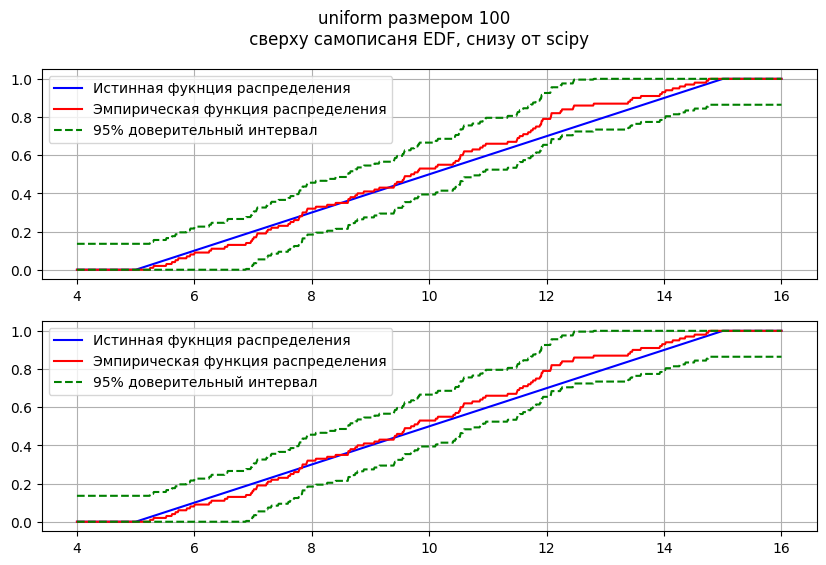

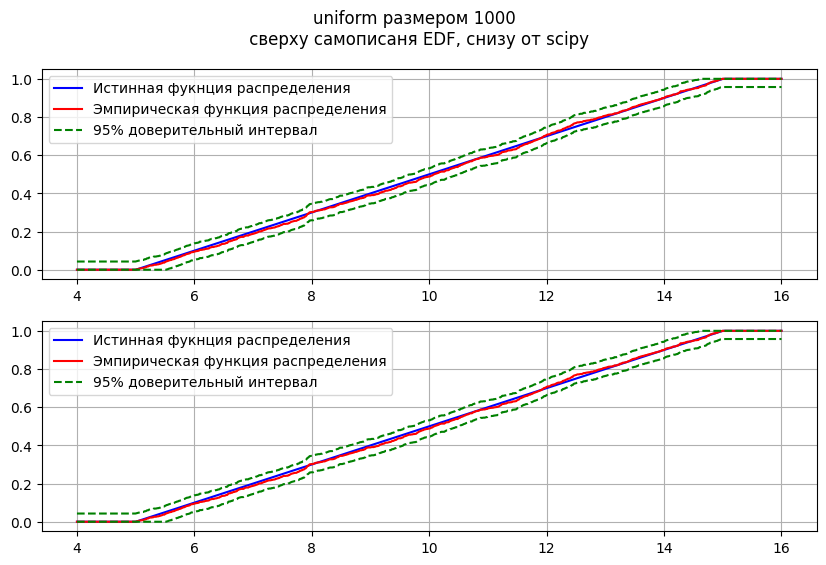

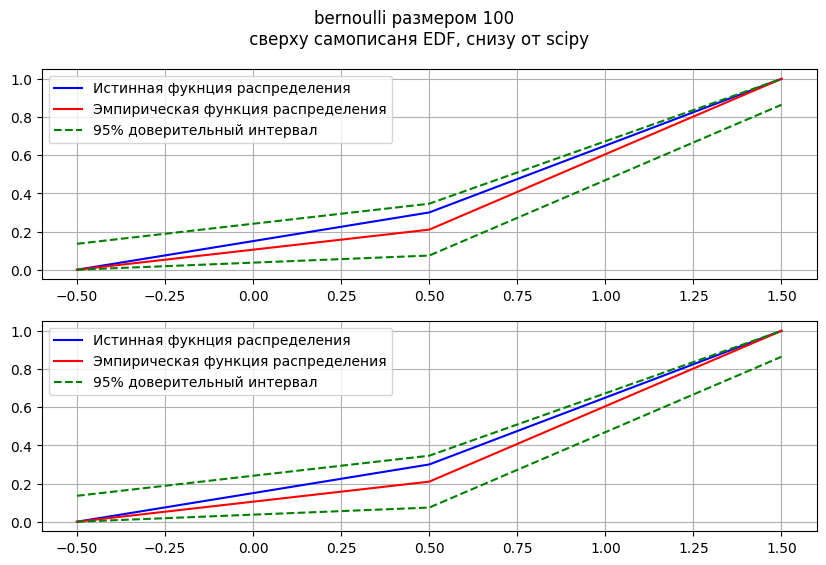

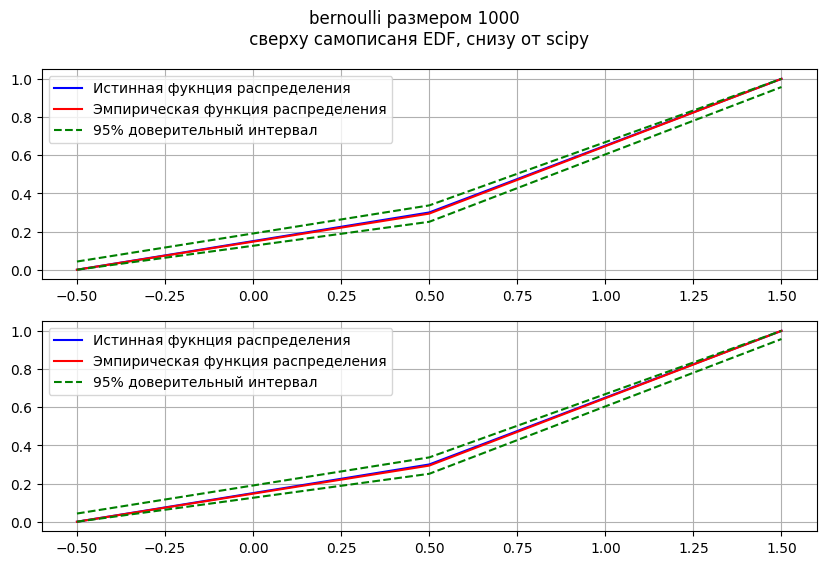

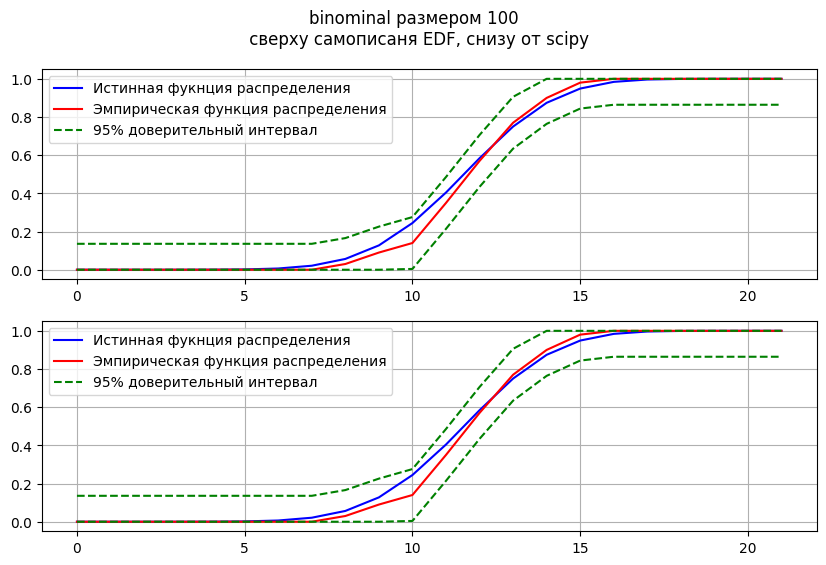

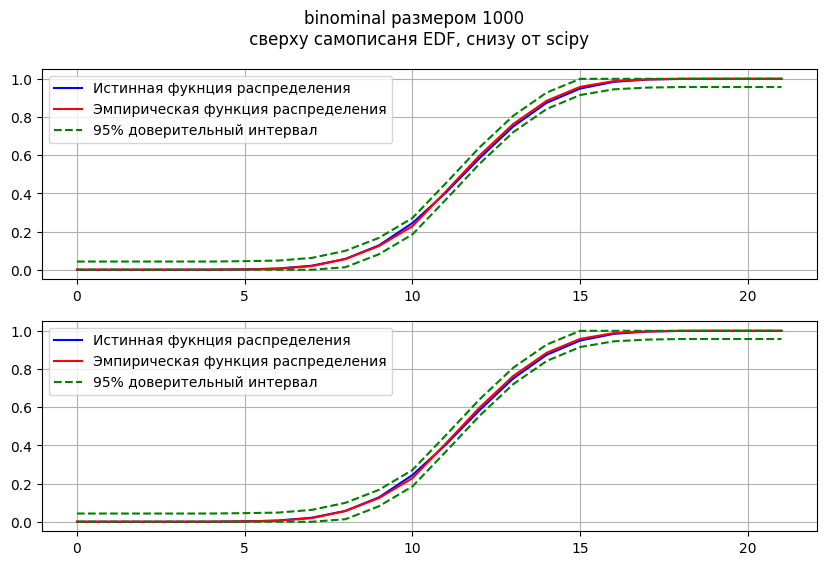

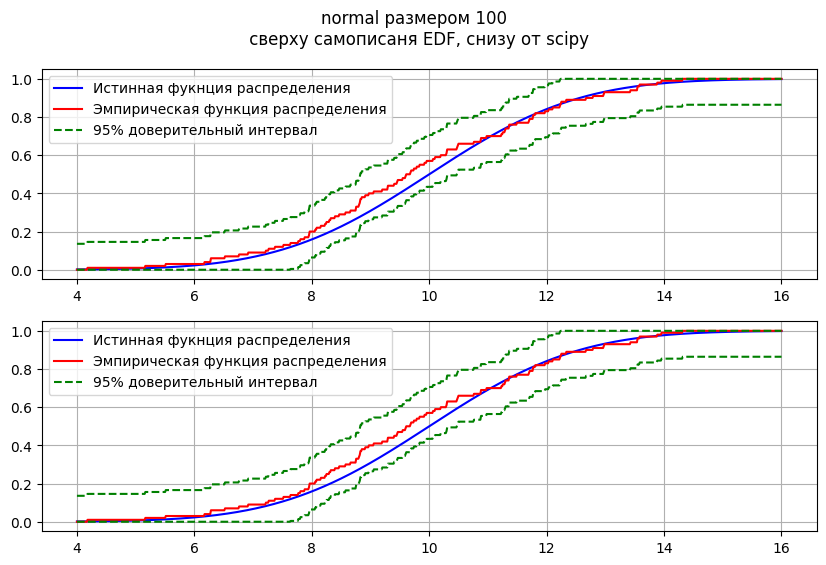

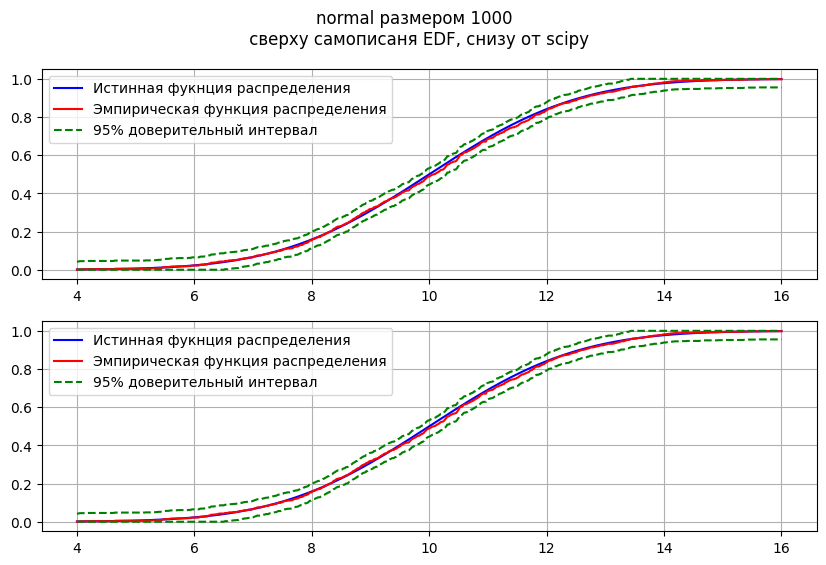

In [9]:
for sample in all_samples:
    draw_distribution_functions(sample)